In [ ]:
import pandas as pd

# load dataset
# dataset from kaggle: https://www.kaggle.com/datasets/prasad22/healthcare-dataset
df = pd.read_csv("healthcare_dataset.csv")


In [27]:
# get an idea of what the dataset looks like
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2/2/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,EMILY JOHNSOn,36,Male,A+,Asthma,12/20/2023,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.11095,389,Urgent,12/24/2023,Ibuprofen,Normal
3,EMILY JOHNSOn,36,Male,A+,Asthma,12/20/2023,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.11095,389,Urgent,12/24/2023,Ibuprofen,Normal
4,DaNnY sMitH,76,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,10/7/2022,Aspirin,Normal


In [28]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

# fill missing values (example: filling with mean for numerical columns)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna("Unknown", inplace=True)

# convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# remove trailing spaces from columns
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

# convert names to title case for readability and consistency
if 'name' in df.columns:
    df['name'] = df['name'].str.title()

# convert date columns to datetime
date_columns = ['date_of_birth', 'date_of_admission', 'date_of_discharge']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])


In [29]:
# save cleaned dataset
output_path = "output_cleaned.csv"
df.to_csv(output_path, index=False)

print(f"Cleaned data saved to {output_path}")

Cleaned data saved to output_cleaned.csv


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# load the cleaned dataset and display the first few rows
df_c = pd.read_csv("output_cleaned.csv")
df_c.head()

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2/2/2024,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,Emily Johnson,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.11095,389,Urgent,12/24/2023,Ibuprofen,Normal
3,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,10/7/2022,Aspirin,Normal
4,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,12/18/2020,Ibuprofen,Abnormal


In [31]:
# look at the distribution and summary of values
df_c.describe(include="all")

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
count,54965,54965.000000,54965,54965,54965,54965,54965,54965,54965,54965.000000,54965.000000,54965,54965,54965,54965
unique,40235,NaN,2,8,6,1827,40340,39875,5,NaN,NaN,3,1856,5,3
top,Michael Williams,NaN,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,3/15/2020,Lipitor,Abnormal
freq,24,NaN,27496,6898,9218,50,27,44,11139,NaN,NaN,18473,53,11038,18437
mean,NaN,51.535741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25544.414779,301.122805,NaN,NaN,NaN,NaN
std,NaN,19.605407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14208.516193,115.223582,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13243.605920,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25543.050480,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37820.489290,401.000000,NaN,NaN,NaN,NaN


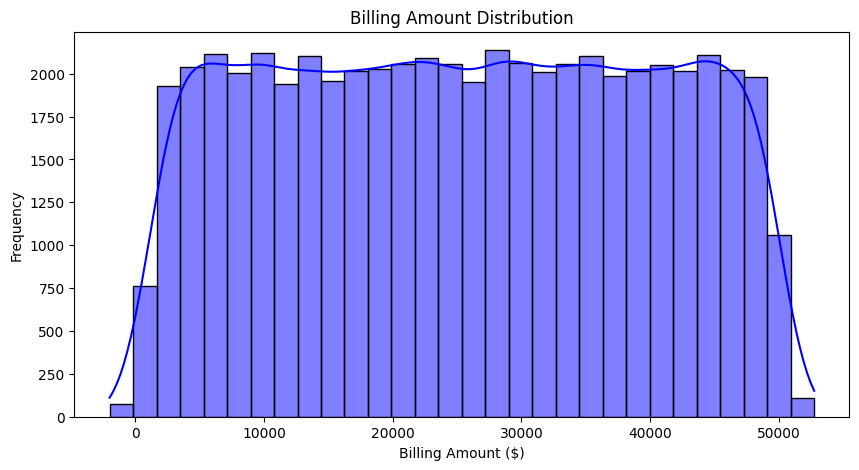

In [32]:
# distribution of Billing Amount
plt.figure(figsize=(10, 5))
sns.histplot(df_c["billing_amount"], bins=30, kde=True, color="blue")
plt.title("Billing Amount Distribution")
plt.xlabel("Billing Amount ($)")
plt.ylabel("Frequency")
plt.show()

C:\Users\ghafo\AppData\Local\Temp\ipykernel_8160\988392971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_c["admission_type"], palette="Set2")


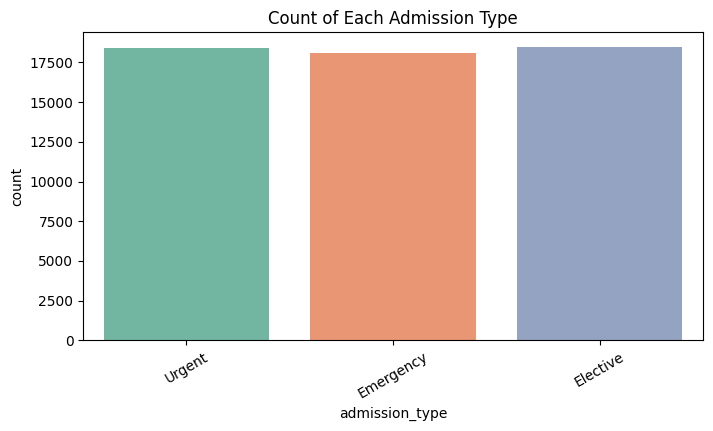

In [33]:
# visualize admission type with count plot
plt.figure(figsize=(8, 4))
sns.countplot(x=df_c["admission_type"], palette="Set2")
plt.title("Count of Each Admission Type")
plt.xticks(rotation=30)
plt.show()

C:\Users\ghafo\AppData\Local\Temp\ipykernel_8160\3081886057.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["year"], palette="viridis")


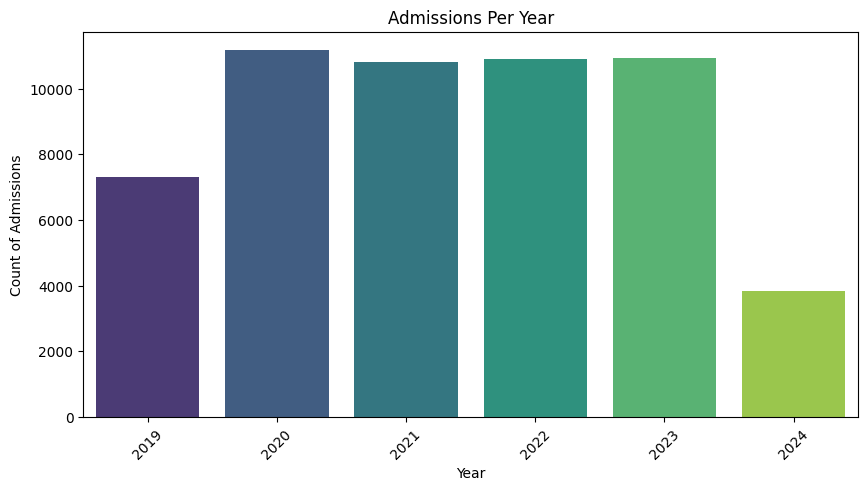

In [ ]:
# visualize admissions of patients over time
plt.figure(figsize=(10, 5))
df["year"] = df["date_of_admission"].dt.year
sns.countplot(x=df["year"], palette="viridis")
plt.title("Admissions Per Year")
plt.xlabel("Year")
plt.ylabel("Count of Admissions")
plt.xticks(rotation=45)
plt.show()

In [35]:
print("Data visualization completed.")

Data visualization completed.
